In [2]:
# import libraries and define global settings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt

# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [3]:
N = 30
data = np.random.randn(N)
data[data<-1] = data[data<-1]+2
data[data>1.5] = data[data>1.5]**2; # force a few outliers


# pick a lenient threshold just for illustration
zscorethresh = 2
dataZ = (data-np.mean(data)) / np.std(data,ddof=1)


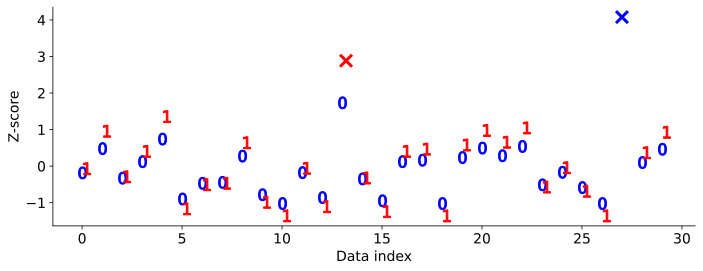

In [4]:
plt.figure(figsize=(10,4))

colorz = 'brkmc'
numiters = 0 # iteration counter
while True:

  # convert to z
  datamean = np.nanmean(dataZ)
  datastd  = np.nanstd(dataZ,ddof=1)
  dataZ = (dataZ-datamean) / datastd

  # find data values to remove
  toremove = dataZ>zscorethresh

  # break out of while loop if no points to remove
  if sum(toremove)==0:
    break
  else:
    # otherwise, mark the outliers in the plot
    plt.plot(np.where(toremove)[0]+numiters/5,dataZ[toremove],'%sx'%colorz[numiters],
             markersize=12,markeredgewidth=3)
    dataZ[toremove] = np.nan

  # replot
  plt.plot(np.arange(N)+numiters/5,dataZ,linestyle='None',marker=f'${numiters}$',markersize=12,
           color=colorz[numiters])

  # update counter
  numiters = numiters + 1

# labels
plt.ylabel('Z-score')
plt.xlabel('Data index')

# display the figure
plt.tight_layout()
plt.show()
     

# Exe 2

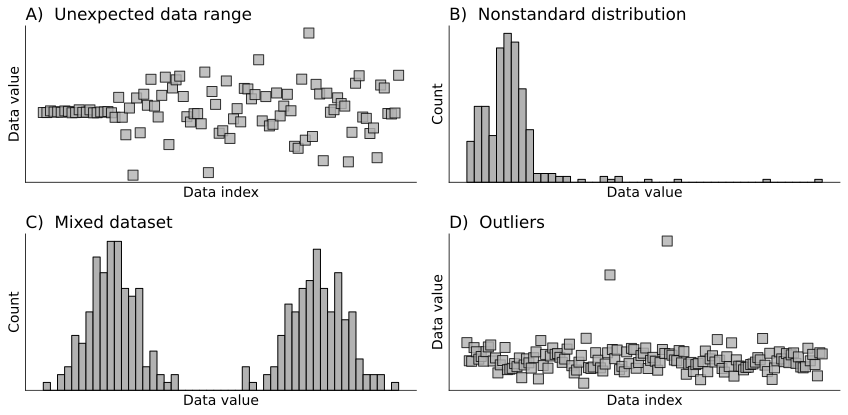

In [5]:
_,axs = plt.subplots(2,2,figsize=(12,6))

# plot A: unexpected range
x = np.concatenate((np.random.randn(20),np.random.randn(80)*30),axis=0)
axs[0,0].plot(x,'ks',markersize=10,markerfacecolor=(.7,.7,.7),alpha=.8)
axs[0,0].set(xlabel='Data index',xticks=[],yticks=[],ylabel='Data value')
axs[0,0].set_title(r'A)  Unexpected data range')

# plot B: distribution shape
x = np.concatenate((5+np.random.randn(150),np.exp(1+np.random.randn(150))),axis=0)
axs[0,1].hist(x,bins='fd',edgecolor='k',facecolor=(.7,.7,.7))
axs[0,1].set(xlabel='Data value',xticks=[],yticks=[],ylabel='Count')
axs[0,1].set_title(r'B)  Nonstandard distribution')

# plot C: mixed datasets
x = np.concatenate((4+np.random.randn(150),np.random.randn(150)-4),axis=0)
axs[1,0].hist(x,bins=50,edgecolor='k',facecolor=(.7,.7,.7))
axs[1,0].set(xlabel='Data value',xticks=[],yticks=[],ylabel='Count')
axs[1,0].set_title(r'C)  Mixed dataset')

# plot D: outliers
x = np.random.randn(150)
x[60] = 10
x[84] = 14
axs[1,1].plot(x,'ks',markersize=10,markerfacecolor=(.7,.7,.7),alpha=.8)
axs[1,1].set(xlabel='Data index',xticks=[],yticks=[],ylabel='Data value')
axs[1,1].set_title(r'D)  Outliers')

# display the figure
plt.tight_layout()
plt.show()
     

# Exe 7.3

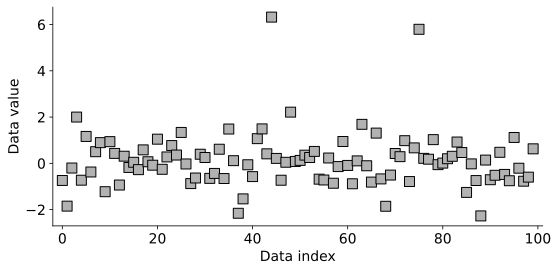

In [6]:
# normally distributed data
N = 100
data = np.random.randn(N)

# add two random outliers in random positions
data[np.random.choice(np.arange(N),2)] = np.random.uniform(2,3,2)**2

# plot
plt.figure(figsize=(8,4))
plt.plot(data,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
plt.xlim([-2,N+1])
plt.xlabel('Data index')
plt.ylabel('Data value')

# display the figure
plt.tight_layout()
plt.show()
     


# Exe 5

In [9]:
# outlier threshold
zThreshold = 3.29

# some raw data
N = 135
data = np.exp(np.random.randn(N)/2) + 5

# zscore 
dataZ = (data-np.mean(data)) / np.std(data,ddof=1)

# identify data indices containing outliers
outliers = np.where(np.abs(dataZ)>zThreshold)[0]

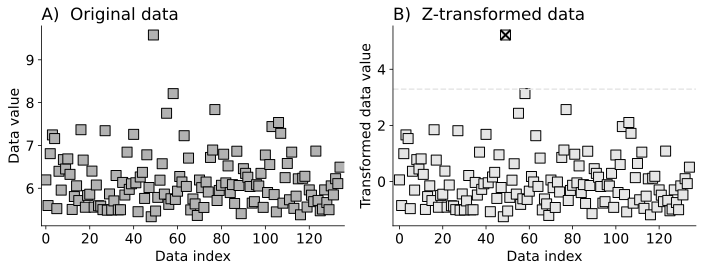

In [10]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))


axs[0].plot(data,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
axs[0].set(xlim=[-2,N+1],xlabel='Data index',ylabel='Data value')
axs[0].set_title(r'A)  Original data')


axs[1].plot(dataZ,'ks',markersize=10,markerfacecolor=(.9,.9,.9))
axs[1].axhline(zThreshold,linestyle='--',color=(.9,.9,.9))
axs[1].plot(outliers,dataZ[outliers],'kx',markersize=10,markeredgewidth=2)
axs[1].set(xlim=[-3,N+2],xlabel='Data index',ylabel='Transformed data value')
axs[1].set_title(r'B)  Z-transformed data')

# display the figure
plt.tight_layout()
plt.show()

# Exe 6

In [11]:
# raw data
N = 10 # sample size
data = np.exp(np.random.randn(N)/2) + 5
data[-1] = np.max(data)+2 # impose an outlier 
xvals = np.arange(N)

dataZ1 = (data-np.mean(data)) / np.std(data,ddof=1)
dataZ2 = (data[:-1]-np.mean(data[:-1])) / np.std(data[:-1],ddof=1)



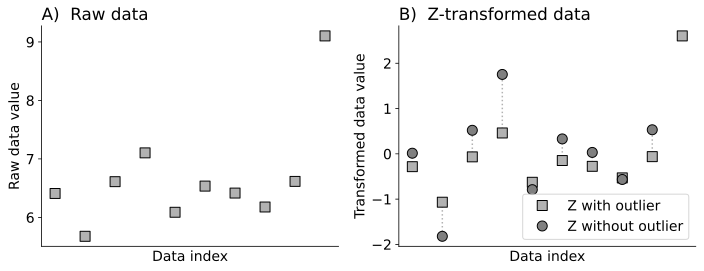

In [12]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))


axs[0].plot(xvals,data,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
axs[0].set(xticks=[],xlabel='Data index',ylabel='Raw data value')
axs[0].set_title(r'A)  Raw data')

axs[1].plot(xvals,dataZ1,'ks',markersize=10,markerfacecolor=(.7,.7,.7),label='Z with outlier')
axs[1].plot(xvals[:-1],dataZ2,'ko',markersize=10,markerfacecolor=(.5,.5,.5),label='Z without outlier')
axs[1].set(xticks=[],xlabel='Data index',ylabel='Transformed data value')
axs[1].legend()
axs[1].set_title(r'B)  Z-transformed data')

# draw lines connection pre/post-removal values
for d,z,x in zip(dataZ1[:-1],dataZ2,xvals[:-1]):
  axs[1].plot([x,x],[d,z],':',color=(.7,.7,.7),zorder=-10)

# display the figure
plt.tight_layout()
plt.show()